## TF Regression *(in progress)*

Data Source: [US Cars Dataset](https://www.kaggle.com/doaaalsenani/usa-cers-dataset)

Data Background: *In progress* <br> 


### Typical architecture of NN Regression 

Hyperparameters (including its typical value):
1. Input layer shape: Same shape as number of features included in the model 
2. Hidden layer: Problem specific (min=1, max= unlimited)
3. Neurons per hidden layer: Problem specific, generally 10-100
4. Output layer shape: Same shape as desired prediction shape (e.g 1 for car price)
5. Hidden activation: Usually ReLu 
6. Output activation: None, ReLU, logistic/tanh
7. Loss function: MSE, MAE, Huber (if outliers)
8. Optimizer: SGD, ADAM 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


### Input & Output Shapes 


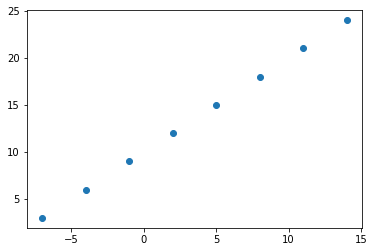

In [2]:
#Creating simple data to view and fit

#features
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14])
#labels 
y = np.array([3,6,9,12,15,18,21,24])
#visualize
plt.scatter(X,y)

In [3]:
#above, we created data using np arrays, but we could do the same with tensors 

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price, house_info.shape

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>,
 TensorShape([3]))

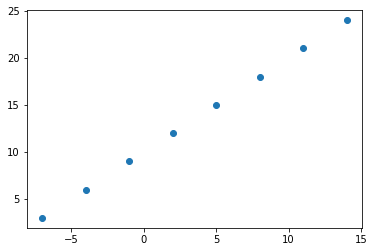

In [4]:
# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

### Steps in modeling 

Typically 3 fundamental steps:
1. Creating a model - piecing together layers of NN or import previously built model (transfer learning)
2. Compiling a model - defining how models performance should be measured (loss/metrics) as well as defining the optimizer 
3. Fitting a model - letting model try to find patterns in data

In [5]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X,y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 471ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [6]:
#check out X, y, and also prediction
X,y, model.predict([17.0])

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[12.716021]], dtype=float32))

It didn't go well, should've output something closer to 27. Now for improvements!

### Improving a Model 

Alter every part of the 3 steps before:
1. Creating a model - Add more layers, increase number of hidden units (neurons), change activation functions 
2. Compiling a model - Choose optimization function or change the learning rate of the optimization function 
3. Fitting a model - fit for more epochs or provide more data 

In [7]:
#train longer for now 
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 248ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0s 4m

In [8]:
X, y, model.predict([17.0])
#prediction is much better now 

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>,
 array([[30.158512]], dtype=float32))

### Evaluation of Model 
Typical workflow when building NN: <br>
Build model -> evaluate -> tweak model (repeat process) <br> 
Visualize!
- The data 
- The model itself (architecture & shapes)
- Training of a model (how does it learrn)
- Predictions of a model (how predictions line up against ground truth) 

In [10]:
#Make a bigger dataset 
X = np.arange(-100, 100, 4)
y = X+10

In [11]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:] 
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

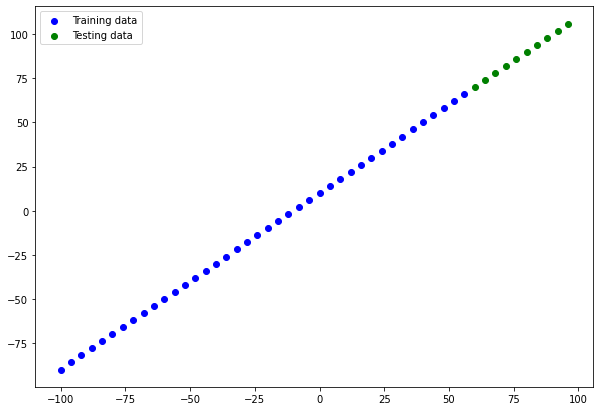

In [12]:
#Visualizing data 
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


- Total params: number of parameters in model 
- Trinable parameters: Patterns the model can update as it trains 
- Non-trainable parameters: These parameters aren't updated during training 

In [15]:
model.fit(X_train, y_train, epochs=100, verbose=0)

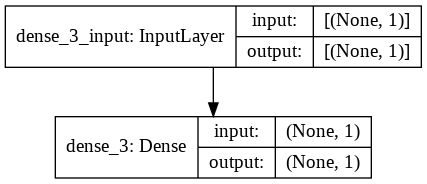

In [17]:
#plot using plot_model 
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [22]:
#visualizing predictions 
y_preds = model.predict(X_test)

In [23]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

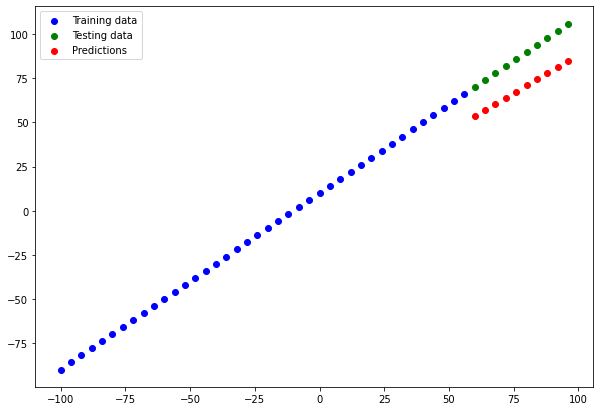

In [24]:
  plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

### Evaluating predictions

In [26]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 17ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

In [27]:
#TF also has built-in functions for MAE 
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([34.42891 , 30.943668, 27.45843 , 23.97319 , 20.487946, 17.202168,
       14.510478, 12.419336, 11.018796, 10.212349], dtype=float32)>

MAE should be a single, but it's 10 values because y_test and y_preds tensors are different shapes. 

In [29]:
print(y_test, y_preds)
print(y_test.shape, y_preds.shape)

[ 70  74  78  82  86  90  94  98 102 106] [[53.57109 ]
 [57.05633 ]
 [60.541573]
 [64.02681 ]
 [67.512054]
 [70.99729 ]
 [74.48254 ]
 [77.96777 ]
 [81.45301 ]
 [84.938255]]
(10,) (10, 1)


In [30]:
#fix using squeeze
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([53.57109 , 57.05633 , 60.541573, 64.02681 , 67.512054, 70.99729 ,
        74.48254 , 77.96777 , 81.45301 , 84.938255], dtype=float32))

In [32]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mae, mse

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

### Running experiments to improve a model 

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns).
2. Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

1. model_1 - same as original model, 1 layer, trained for 100 epochs.
2. model_2 - 2 layers, trained for 100 epochs.
3. model_3 - 2 layers, trained for 500 epochs.

In [36]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [33]:
#Build model_1
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 4ms/step - loss:

(18.745327, 353.57336)

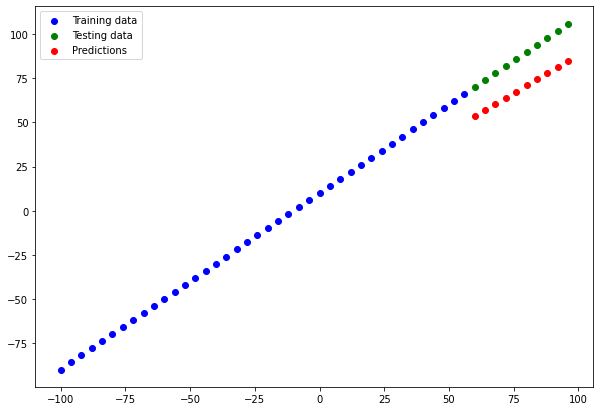

In [37]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
plot_predictions(predictions=y_preds_1)
mae_1, mse_1

In [38]:
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(X_train, y_train, epochs=100, verbose=0) # set verbose to 0 for less output

(1.9098114, 5.459232)

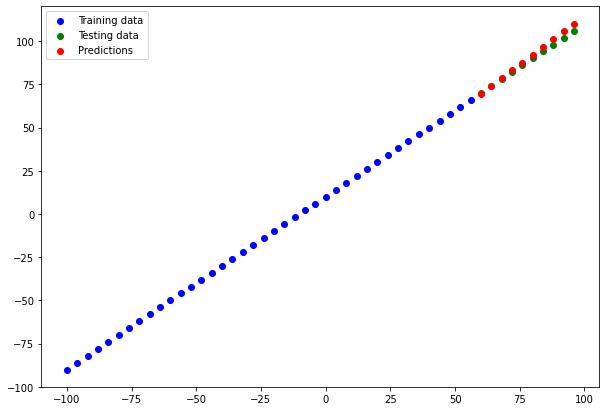

In [39]:
y_preds_2 = model_2.predict(X_test)
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
plot_predictions(predictions=y_preds_2)
mae_2, mse_2

In [40]:
#Build model 3

tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(X_train, y_train, epochs=500, verbose=0) # set verbose to 0 for less output

(68.68786, 4804.4717)

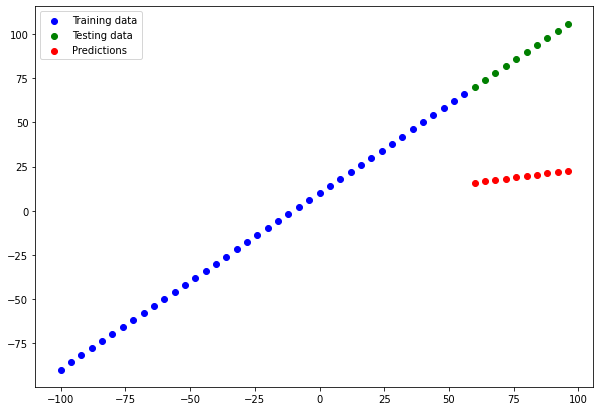

In [41]:
y_preds_3 = model_3.predict(X_test)
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
plot_predictions(predictions=y_preds_3)
mae_3, mse_3

In [42]:
import pandas as pd 
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


### Tracking experiments 

1. [TensorBoard](https://tensorboard.dev/) 
2. [Weights & Biases ](https://wandb.ai/site)

### Saving & Loading Model 

1. SavedModel format 
2. HDF5 format

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

It depends on your situation but the SavedModel format will suffice most of the time.

In [43]:
model_2.save('best_model_SavedModel_format')

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [44]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	saved_model.pb	variables


In [45]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [46]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [47]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()


True

In [48]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 2         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [49]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

True

In [50]:
#Downloading a model from Google Colab 
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### An actual larger example 

In [51]:
#import required libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [53]:
link = 'https://drive.google.com/file/d/1o9XTjfi30VxcbmXg-3CzebeYHKZp-cTC/view?usp=sharing'
# to get the id part of the file 
id = link.split("/")[-2] 
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('USA_cars_datasets.csv')

In [91]:
#insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
#Cars dataset from kaggle 
cars = pd.read_csv('USA_cars_datasets.csv')
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [93]:
#drop the first column 
cars = cars.drop(['Unnamed: 0'], axis =1)
cars.head()

,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [94]:
#convert categorical variables into numerical variables using one-hot encoding 
cars_one_hot = pd.get_dummies(cars)
cars_one_hot.head() # view the converted columns

,price,year,mileage,lot,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,brand_dodge,brand_ford,brand_gmc,brand_harley-davidson,brand_heartland,brand_honda,brand_hyundai,brand_infiniti,brand_jaguar,brand_jeep,brand_kia,brand_land,brand_lexus,brand_lincoln,brand_maserati,brand_mazda,brand_mercedes-benz,brand_nissan,brand_peterbilt,brand_ram,brand_toyota,model_1500,model_2500,model_2500hd,model_300,model_3500,model_5,model_acadia,model_altima,...,condition_13 days left,condition_14 hours left,condition_15 days left,condition_15 hours left,condition_16 hours left,condition_16 minutes,condition_17 hours left,condition_18 hours left,condition_19 hours left,condition_2 days left,condition_2 hours left,condition_20 hours left,condition_21 hours left,condition_22 hours left,condition_23 hours left,condition_24 hours left,condition_27 minutes,condition_28 minutes,condition_29 minutes,condition_3 days left,condition_3 hours left,condition_30 minutes,condition_32 minutes,condition_34 minutes,condition_36 minutes,condition_4 days left,condition_4 hours left,condition_47 minutes,condition_48 minutes,condition_5 days left,condition_5 hours left,condition_53 minutes,condition_6 days left,condition_6 hours left,condition_7 days left,condition_7 hours left,condition_8 days left,condition_9 days left,condition_9 minutes,condition_Listing Expired
0,6300,2008,274117.0,159348797,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2899,2011,190552.0,166951262,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,5350,2018,39590.0,167655728,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,25000,2014,64146.0,167753855,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,27700,2018,6654.0,167763266,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
#split data into features and labels 
X = cars_one_hot.drop("price", axis = 1)
y = cars_one_hot["price"]

# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42) # set random state for reproducible splits

In [99]:
#Build and fit a model 
tf.random.set_seed(37)

cars_model = tf.keras.Sequential([
                                  tf.keras.layers.Dense(1),
                                  tf.keras.layers.Dense(1)
])

#Compiling model 
cars_model.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])

In [100]:
#Fit model 
cars_model.fit(X_train, y_train, epochs = 100, verbose=0)
cars_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 1)                 2798      
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 2         
Total params: 2,800
Trainable params: 2,800
Non-trainable params: 0
_________________________________________________________________


In [101]:
#check results 
cars_model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 8727.0449 - mae: 8727.0449


[8727.044921875, 8727.044921875]

In [105]:
#Try a bigger model 
tf.random.set_seed(37)

cars_model2 = tf.keras.Sequential([
                                  tf.keras.layers.Dense(10),
                                  tf.keras.layers.Dense(1)
])

#Compiling model 
cars_model2.compile(loss=tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["mae"])
#Fit model and save history 
history = cars_model2.fit(X_train, y_train, epochs = 300, verbose=0)

In [106]:
print(cars_model2.summary())
print(cars_model2.evaluate(X_test,y_test))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 10)                27980     
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 11        
Total params: 27,991
Trainable params: 27,991
Non-trainable params: 0
_________________________________________________________________
None
16/16 [==============================] - 0s 2ms/step - loss: 41135.2734 - mae: 41135.2734
[41135.2734375, 41135.2734375]


Text(0.5, 0, 'epochs')

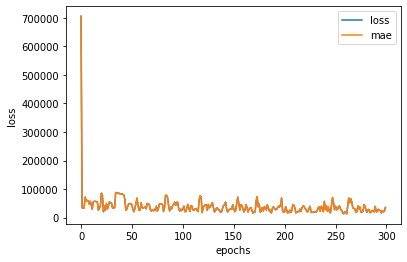

In [107]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")